# Multivariate: Independent

## Import libraries 

In [1]:
import pickle
import numpy as np
import xarray as xr
import seaborn as sns

import synthia as syn

import warnings
warnings.filterwarnings('ignore')

##  Create test data

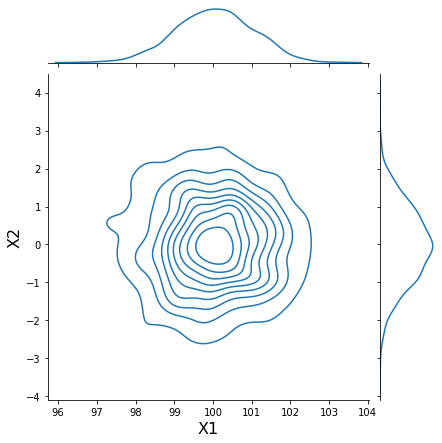

In [2]:
# Create a sample dataset with n samples
N_SAMPLES = 1000

# Generate normally distributed random samples with two features
data = np.empty((N_SAMPLES, 2))
data[:,0] = np.random.normal(loc=100.0, size=N_SAMPLES)
data[:,1] = np.random.normal(loc=0.0, size=N_SAMPLES)

h = sns.jointplot(data[:, 0], data[:, 1], kind='kde', stat_func=None)
h.set_axis_labels('X1', 'X2', fontsize=16);

## Generate synthetic data

Storage size: 17049 bytes


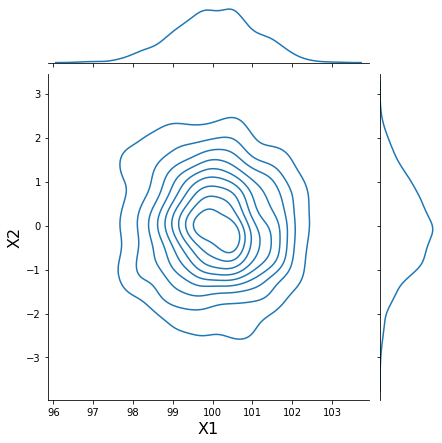

In [3]:
generator = syn.CopulaDataGenerator()

generator.fit(data, copula=syn.IndependenceCopula())

print(f'Storage size: {len(pickle.dumps(generator))} bytes')

samples = generator.generate(n_samples=N_SAMPLES)

h = sns.jointplot(samples[:, 0], samples[:, 1], kind='kde', stat_func=None)
h.set_axis_labels('X1', 'X2', fontsize=16);

## Generate synthetic data with modified characteristics

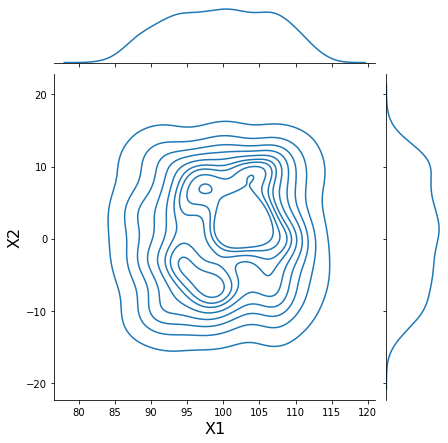

In [4]:
samples = generator.generate(n_samples=N_SAMPLES, uniformization_ratio=0.5, stretch_factor=5)

h = sns.jointplot(samples[:, 0], samples[:, 1], kind='kde', stat_func=None)
h.set_axis_labels('X1', 'X2', fontsize=16);

## Parameterize data using quantiles
Parameterization can be useful if the generator should be saved (pickled) while reducing the storage size.

Storage size: 2633 bytes


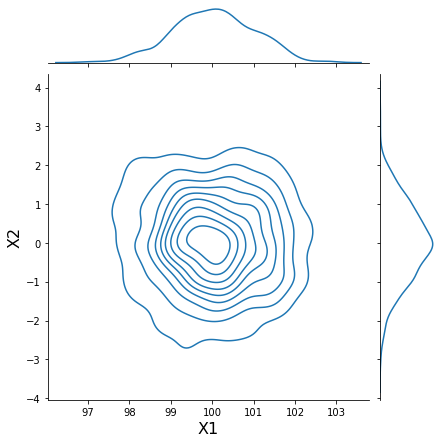

In [5]:
generator = syn.CopulaDataGenerator()

parameterizer = syn.QuantileParameterizer(n_quantiles=100)

generator.fit(data, copula=syn.IndependenceCopula(), parameterize_by=parameterizer)

print(f'Storage size: {len(pickle.dumps(generator))} bytes')

samples = generator.generate(n_samples=N_SAMPLES)

h = sns.jointplot(samples[:, 0], samples[:, 1], kind='kde', stat_func=None)
h.set_axis_labels('X1', 'X2', fontsize=16);

## Parameterize data using distributions
Parameterization can be useful if the generator should be saved (pickled) while reducing the storage size.

Storage size: 1160 bytes


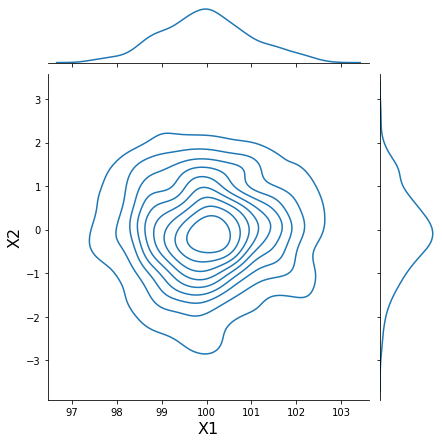

In [6]:
generator = syn.CopulaDataGenerator()

# Use dist_names = None to try all available distributions. Note that this may take a while.
dist_names = ['norm']
parameterizer = syn.DistributionParameterizer(dist_names)

generator.fit(data, copula=syn.IndependenceCopula(), parameterize_by=parameterizer)

print(f'Storage size: {len(pickle.dumps(generator))} bytes')

samples = generator.generate(n_samples=N_SAMPLES)

h = sns.jointplot(samples[:, 0], samples[:, 1], kind='kde', stat_func=None)
h.set_axis_labels('X1', 'X2', fontsize=16);